### Question 1)
Read the given dataset as a dataframe and check for missing values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("jewel.csv")

zero_not_accepted = ["carat", "depth", "table", "price", "x", "y", "z"]
for column in zero_not_accepted:
    df = df[df[column] != 0]

filt = pd.notnull(df)
df = df[filt]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

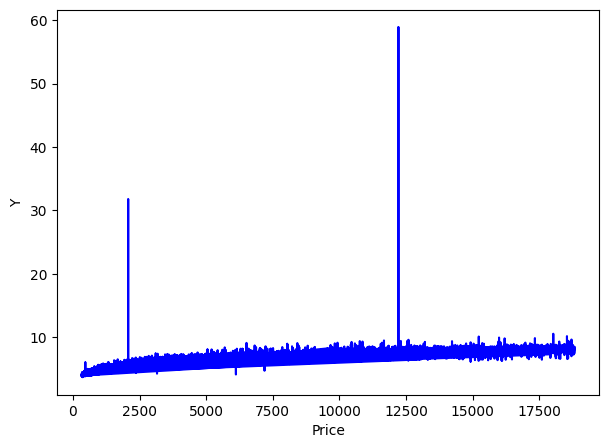

In [2]:
plt.figure(figsize=(7,5)) 
plt.plot(df["price"], df["y"], color="b")
plt.xlabel("Price")
plt.ylabel("Y")
plt.show()

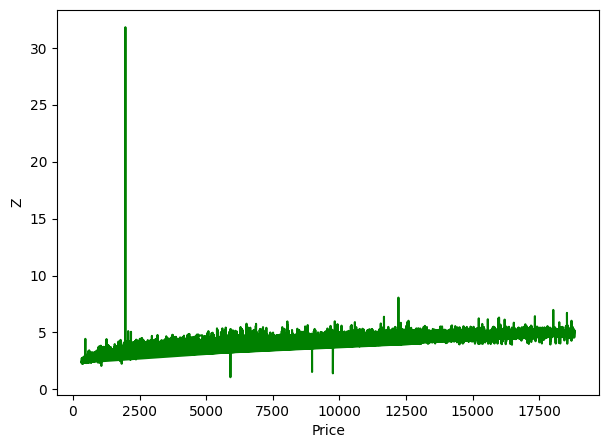

In [3]:
plt.figure(figsize=(7,5)) 
plt.plot(df["price"], df["z"], color="g")
plt.xlabel("Price")
plt.ylabel("Z")
plt.show()

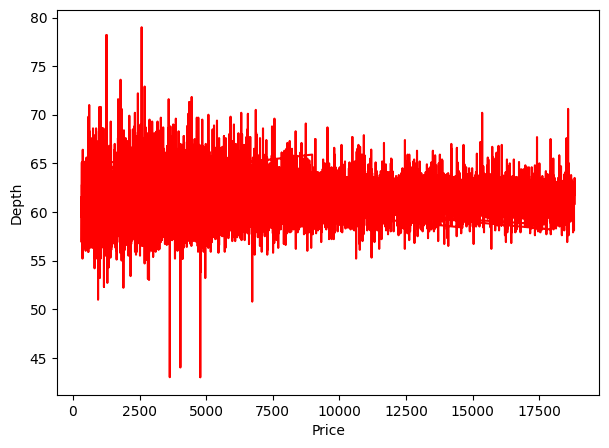

In [4]:
plt.figure(figsize=(7,5)) 
plt.plot(df["price"], df["depth"], color="r")
plt.xlabel("Price")
plt.ylabel("Depth")
plt.show()

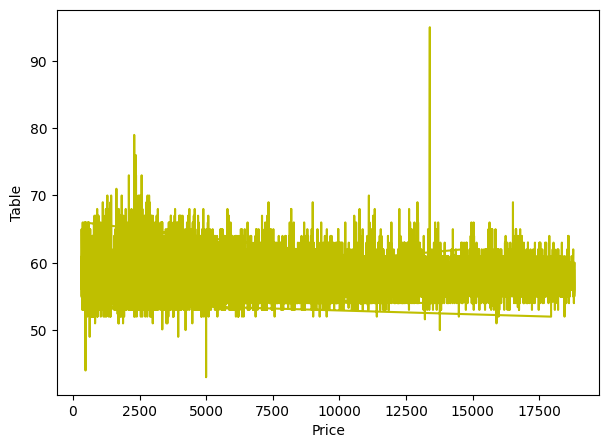

In [5]:
plt.figure(figsize=(7,5)) 
plt.plot(df["price"], df["table"], color="y")
plt.xlabel("Price")
plt.ylabel("Table")
plt.show()

### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

In [6]:
def remove_outliers(df):
    std_deviations = 3
    
    constrains = df.select_dtypes(include = [np.number]) 
    constrains = constrains.apply(lambda x: np.abs(x - x.mean()) / x.std() < std_deviations).all(axis=1)

    df.drop(df.index[~constrains], inplace=True)

In [7]:
remove_outliers(df)

I remove the outliers by using the Z-score. First for each integer cell I calculate the Z-score with the formula: 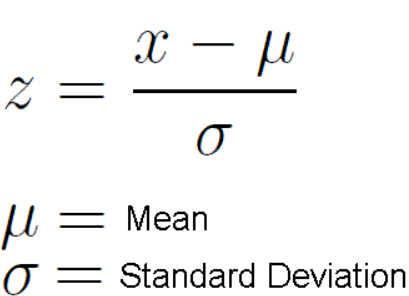 Then I remove the value if the score is more than 3 standard deviations .

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [8]:
def replace_ordinal(x):
    replacer = {
        # For "cut"
        'Good': 1,
        'Very Good': 2,
        'Fair': 3,
        'Ideal': 4,
        'Premium': 5,
        # For "color"
        'J': 1,
        'I': 2,
        'H': 3,
        'G': 4,
        'F': 5,
        'E': 6,
        'D': 7,
        # For "clarity"
        'I1': 1,
        'SI1': 2,
        'SI2': 3,
        'VS1': 4,
        'VS2': 5,
        'VVS1': 6,
        'VVS2': 7,
        'IF': 8
    }
    
    return replacer.get(x)

In [9]:
df["cut"] = df["cut"].apply(replace_ordinal)
df["color"] = df["color"].apply(replace_ordinal)
df["clarity"] = df["clarity"].apply(replace_ordinal)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,1,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


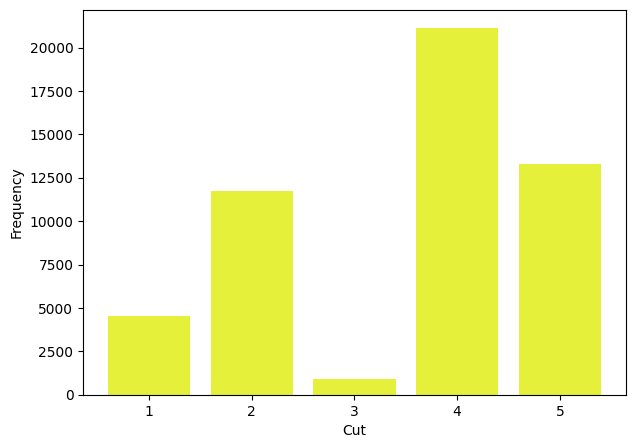

In [10]:
value, count = np.unique(df["cut"], return_counts=True)
plt.figure(figsize=(7,5))
plt.bar(value, count, color="#e4f03a")
plt.xlabel("Cut")
plt.ylabel("Frequency")
plt.show()

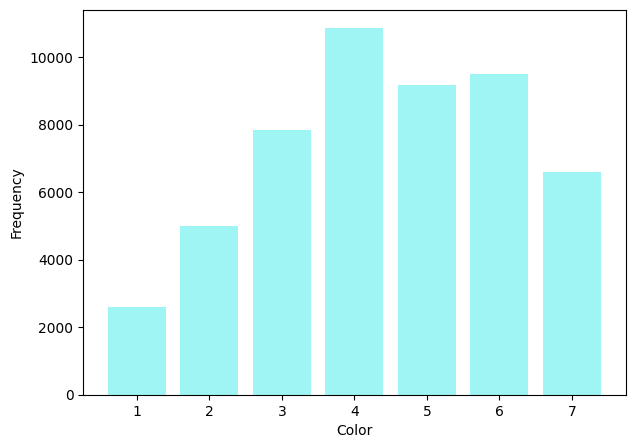

In [11]:
value, count = np.unique(df["color"], return_counts=True)
plt.figure(figsize=(7,5)) 
plt.bar(value, count, color="#9ff5f3")
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.show()

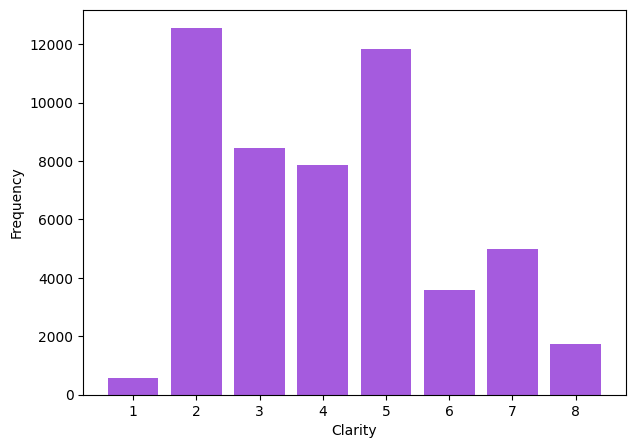

In [12]:
value, count = np.unique(df["clarity"], return_counts=True)
plt.figure(figsize=(7,5)) 
plt.bar(value, count, color="#a55bde")
plt.xlabel("Clarity")
plt.ylabel("Frequency")
plt.show()

### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [13]:
# Shuffling the data
dataLength = len(df)
df = df.iloc[np.random.permutation(dataLength)]

# Splitting the data into training and testing set
trainingSet = df.iloc[ :int(dataLength*0.7), : ]
testingSet = df.iloc[int(dataLength*0.7): , : ]

Y_train = trainingSet["price"]
X_train = trainingSet.drop(columns=["price"])

Y_test = testingSet["price"]
X_test = testingSet.drop(columns=["price"])

### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_reg = KNeighborsRegressor(n_neighbors = 10)
knn_reg.fit(X_train, Y_train)
Y_predict = knn_reg.predict(X_test)

mean_squared_error(Y_test, Y_predict)

631066.8501505557

In [15]:
knn_mse = []

for k in range(1, 31):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, Y_train)
    Y_predict = knn_reg.predict(X_test)
    err = mean_squared_error(Y_test, Y_predict)
    knn_mse.append(err)
    print(err)

833446.8836908762
682376.1170360558
655568.2512420665
634244.7964348022
624830.3678986818
613529.6263461703
613161.2773247319
621929.4243122415
626580.1305637722
631066.8501505557
632804.6999561037
635592.6091053173
641468.917056148
649621.4858022428
659235.1840369317
667086.328830225
674842.5208969619
680170.300805269
689233.7705212753
698664.2565803502
704184.0765432132
711029.9672299845
718824.3119708253
726462.1101823658
733095.0371538898
737019.3480013337
745114.663041956
752494.3998820096
759155.631377832
765626.8513808477


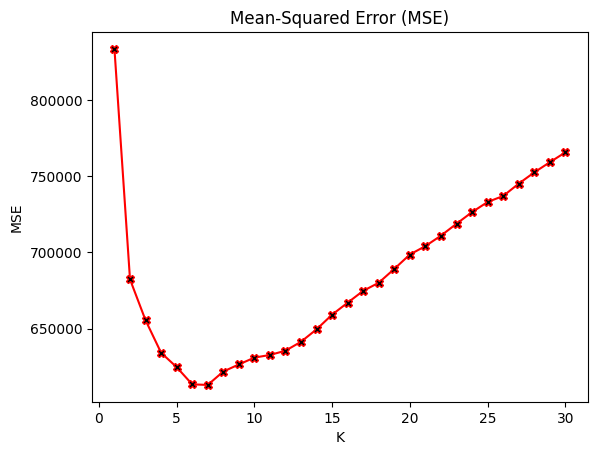

In [16]:
plt.plot(range(1, 31), knn_mse, color='r', marker='X', markerfacecolor='#000000')
plt.title("Mean-Squared Error (MSE)")
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()

To find the best k-value I first calculate MSE for all k-values between 1-30. Then I plot the MSE versus k-value graph to detect the best k-value. So according to my graph the best k-value is 7 because it is the value with the lowest MSE.

### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Y = df["price"]
X = df.drop(columns=["price"])

bestK_reg = KNeighborsRegressor(n_neighbors=7)
accuracy = cross_val_score(bestK_reg, X, Y, cv=10)
accuracy.mean()

0.953423589254952

### Question 9)

Predict the price of new jewel data with the following custom features. 

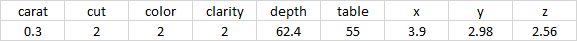

In [18]:
bestK_reg.fit(X, Y)
jewel = [[0.3, 2, 2, 2, 62.4, 55, 3.9, 2.98, 2.56]]
jewel = pd.DataFrame(jewel, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
prediction = bestK_reg.predict(jewel)
print(prediction)

[471.71428571]
